# Loan Prediction

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset

loands = pd.read_csv('Loanprediction.csv')
loands

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


as per above we can see there is 614 rows and 13 columns in this datset.

# Performing EDA

In [3]:
loands.shape

(614, 13)

In [4]:
loands.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
loands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loands.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

as per above this dataset contain 3 type of data(int,float,object).

In [7]:
# setting Loan_ID column as index column

loands.set_index('Loan_ID' , inplace=True)

In [8]:
loands

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [9]:
# checking null value

loands.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:ylabel='Loan_ID'>

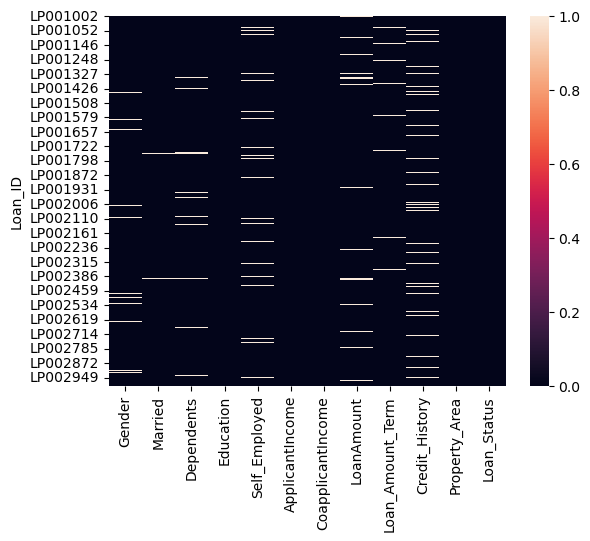

In [10]:
# using heatmap for null value

sns.heatmap(loands.isnull())

as per above we can see that there is null values present in the dataset.

# Removing Null value 

we use mean and median to remove null value for integer and float data .

we use mode to remove null value for string data.

In [11]:
loands['Gender'] = loands['Gender'].fillna(loands['Gender'].mode())

In [12]:
loands['Married'] = loands['Married'].fillna(loands['Married'].mode())

In [13]:
loands['Dependents'] = loands['Dependents'].fillna(loands['Dependents'].mode())

In [14]:
loands['Self_Employed'] = loands['Self_Employed'].fillna(loands['Self_Employed'].mode())

In [15]:
loands['LoanAmount'] = loands['LoanAmount'].fillna(loands['LoanAmount'].mean())

In [16]:
loands['Loan_Amount_Term'] = loands['Loan_Amount_Term'].fillna(loands['Loan_Amount_Term'].mean())

In [17]:
loands['Credit_History'] = loands['Credit_History'].fillna(loands['Credit_History'].mean())

In [18]:
loands

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y


In [19]:
# checking the values counts of each column

for i in loands.columns:
    print(loands[i].value_counts()) # this is checking the frequency 
    print('\n')

Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0     

as per above we can see that there is no blank space or white space in this dataset.

# Now Converting String data into numerical 

Here we will use label encoder to convert string and float data into numerical data and it will also removed null values.

In [20]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
columns =[ 'Gender', 'Married','Dependents', 'Education','Self_Employed', 'CoapplicantIncome', 'LoanAmount',
          'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

loands[columns] = loands[columns].apply(le.fit_transform)

In [23]:
loands

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0,100,9,2,2,1
LP001003,1,1,1,0,0,4583,60,81,9,2,0,0
LP001005,1,1,0,0,1,3000,0,26,9,2,2,1
LP001006,1,1,0,1,0,2583,160,73,9,2,2,1
LP001008,1,0,0,0,0,6000,0,94,9,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,0,0,0,2900,0,29,9,2,0,1
LP002979,1,1,3,0,0,4106,0,7,5,2,0,1
LP002983,1,1,1,0,0,8072,3,163,9,2,2,1


now we see that whole dataset is converted into numerical and there is no null value present dataset.

In [24]:
loands.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,78.884365,87.719870,8.526059,1.628664,1.037459,0.687296
std,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,92.623999,45.670174,1.404423,0.724018,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,53.250000,9.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,33.500000,82.000000,9.000000,2.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,153.750000,116.750000,9.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,286.000000,203.000000,10.000000,2.000000,2.000000,1.000000


Its a statistical difference of numerical dataset.

as per above we can see that there is differnce between mean and median of the dataset.

As per describe we can also see that there is differnce between 75% and max value means there is outlier present in the dataset.

We can also get STD , 25% and min of the dataset.

# Lets Check Correlation

In [25]:
loands_corr = loands.corr()
loands_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.167229,0.163820,-0.063125,0.006613,-0.030903,0.008690
Married,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.196097,0.186060,-0.087488,0.000091,0.007973,0.096657
Dependents,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,-0.077131,0.138470,-0.080827,-0.062374,0.032600,-0.007318
Education,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.052724,-0.172249,-0.088487,-0.083070,-0.065243,-0.085884
Self_Employed,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,-0.011169,0.080686,-0.027814,0.030401,-0.013439,0.010880
ApplicantIncome,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.160891,0.430574,-0.043774,-0.005018,-0.009500,-0.004710
CoapplicantIncome,0.167229,0.196097,-0.077131,-0.052724,-0.011169,-0.160891,1.000000,0.264136,-0.020010,-0.036084,-0.082223,0.007812
LoanAmount,0.163820,0.186060,0.138470,-0.172249,0.080686,0.430574,0.264136,1.000000,0.065580,-0.014301,-0.084076,-0.049717
Loan_Amount_Term,-0.063125,-0.087488,-0.080827,-0.088487,-0.027814,-0.043774,-0.020010,0.065580,1.000000,0.023971,-0.091598,0.002512
Credit_History,0.006613,0.000091,-0.062374,-0.083070,0.030401,-0.005018,-0.036084,-0.014301,0.023971,1.000000,-0.009898,0.513319


<AxesSubplot:>

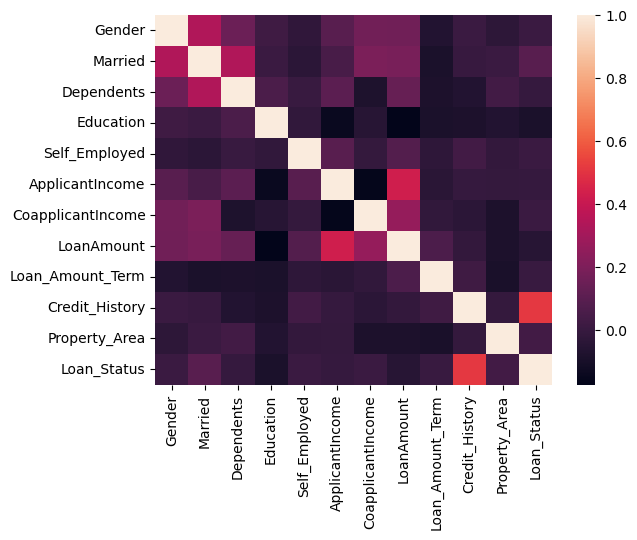

In [26]:
# heatmap for correlation

sns.heatmap(loands.corr())

In [27]:
loands.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Data Visualization

1. Univariate Analysis

1    489
0    112
2     13
Name: Gender, dtype: int64


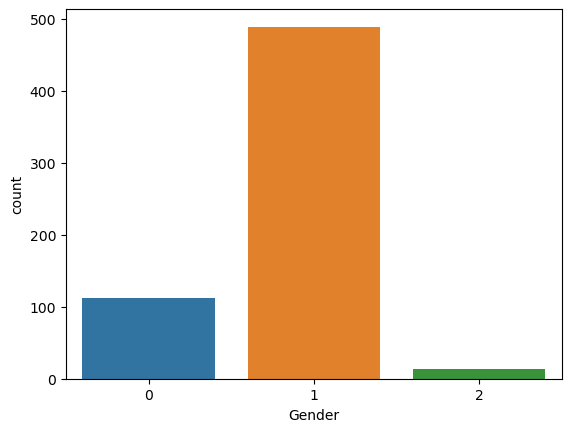

In [28]:
sns.countplot(loands['Gender'])
print(loands['Gender'].value_counts())

as per above plot we cab see that point 1 has the highest number of values .

1    398
0    213
2      3
Name: Married, dtype: int64


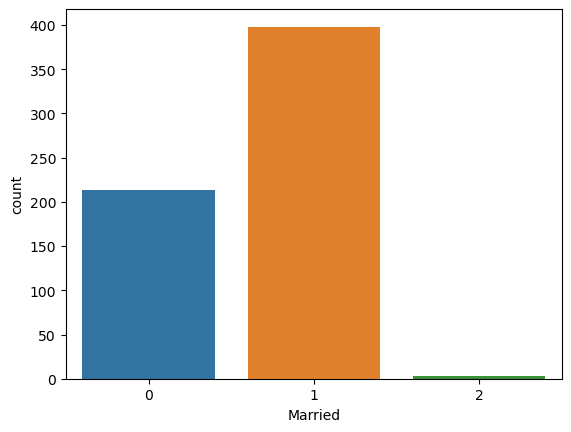

In [29]:
sns.countplot(loands['Married'])
print(loands['Married'].value_counts())

in this plot we can see that married column has maximum value for point 1.

0    345
1    102
2    101
3     51
4     15
Name: Dependents, dtype: int64


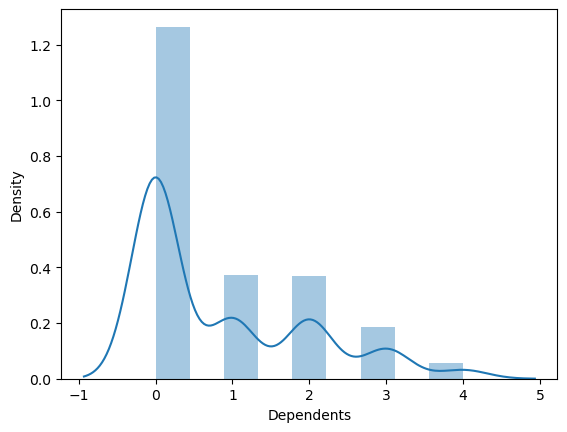

In [31]:
sns.distplot(loands['Dependents'])
print(loands['Dependents'].value_counts())

In this plot we see that point 0 has the highest value.

0    480
1    134
Name: Education, dtype: int64


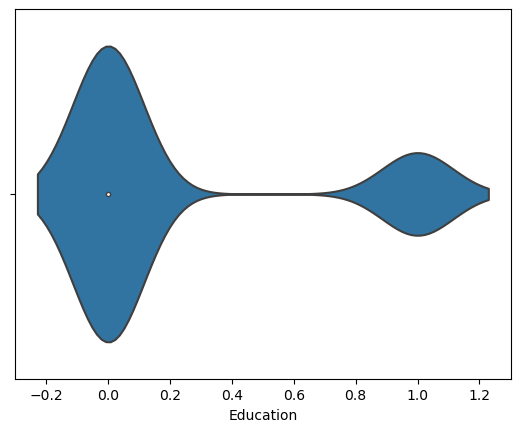

In [32]:
sns.violinplot(loands['Education'])
print(loands['Education'].value_counts())

In this we cab see that point 0 have maximum values .

0    500
1     82
2     32
Name: Self_Employed, dtype: int64


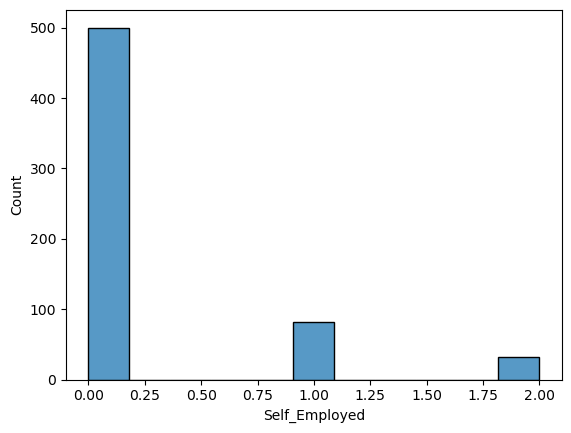

In [33]:
sns.histplot(loands['Self_Employed'])
print(loands['Self_Employed'].value_counts())

In this plot point 0 has highest values and point2 has lowest value.

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


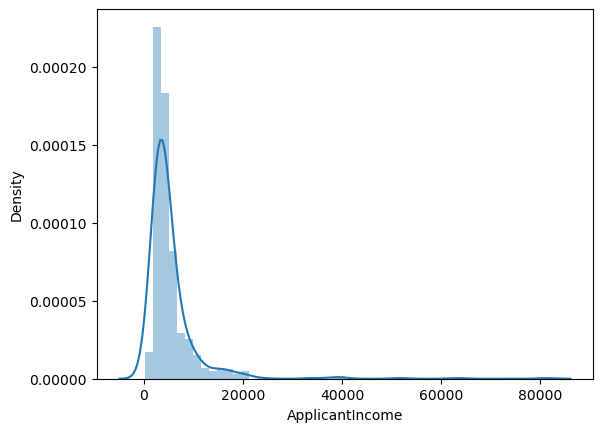

In [35]:
sns.distplot(loands['ApplicantIncome'])
print(loands['ApplicantIncome'].value_counts())

In this there is maximum applicant isin between 0 to 2000.

0      273
173      5
130      5
77       5
149      3
      ... 
186      1
22       1
80       1
180      1
3        1
Name: CoapplicantIncome, Length: 287, dtype: int64


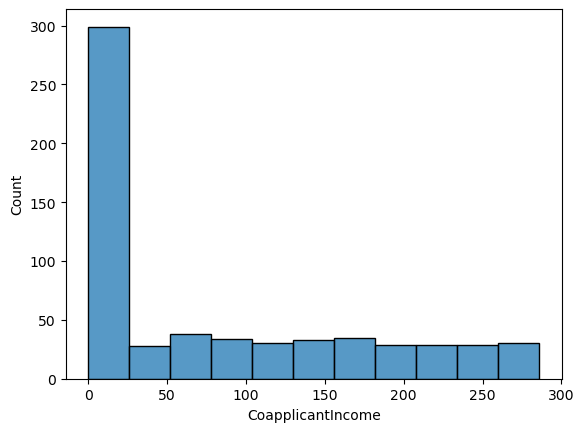

In [37]:
sns.histplot(loands['CoapplicantIncome'])
print(loands['CoapplicantIncome'].value_counts())

As per above plot point 0 has highest number of coapplicant income.

100    22
73     20
63     17
53     15
113    12
       ..
157     1
148     1
20      1
118     1
163     1
Name: LoanAmount, Length: 204, dtype: int64


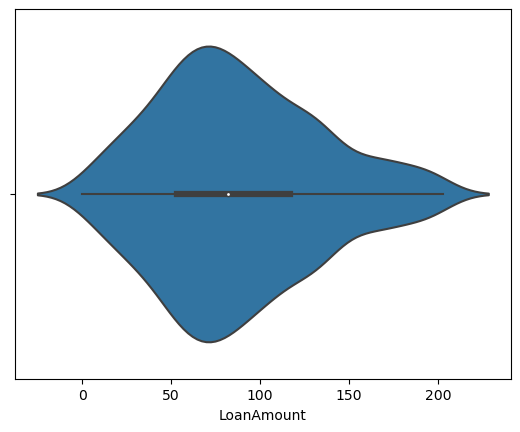

In [38]:
sns.violinplot(loands['LoanAmount'])
print(loands['LoanAmount'].value_counts())

In the loan amount plot the maximum values is in betweeb 50 to 100.

9     512
5      44
10     15
8      14
7      13
6       4
3       4
4       3
2       2
1       2
0       1
Name: Loan_Amount_Term, dtype: int64


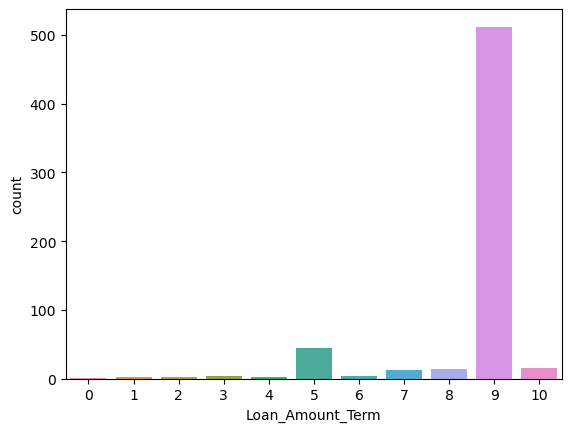

In [39]:
sns.countplot(loands['Loan_Amount_Term'])
print(loands['Loan_Amount_Term'].value_counts())

In loan amount term point 9 has maximum values.

2    475
0     89
1     50
Name: Credit_History, dtype: int64


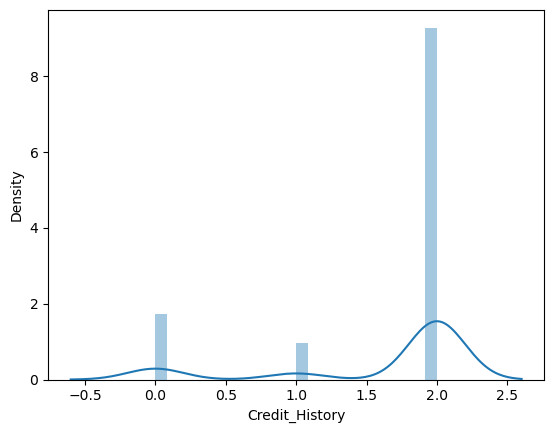

In [40]:
sns.distplot(loands['Credit_History'])
print(loands['Credit_History'].value_counts())

In the credit history plot there is 3 peak but highest peal at point 2.0.

1    233
2    202
0    179
Name: Property_Area, dtype: int64


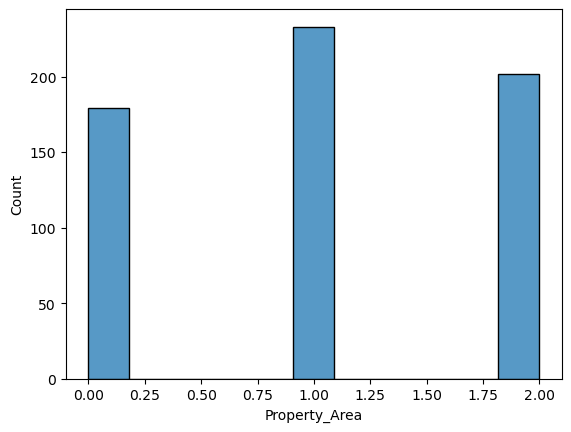

In [41]:
sns.histplot(loands['Property_Area'])
print(loands['Property_Area'].value_counts())

as per property plot we see that highest value is at point 1.

1    422
0    192
Name: Loan_Status, dtype: int64


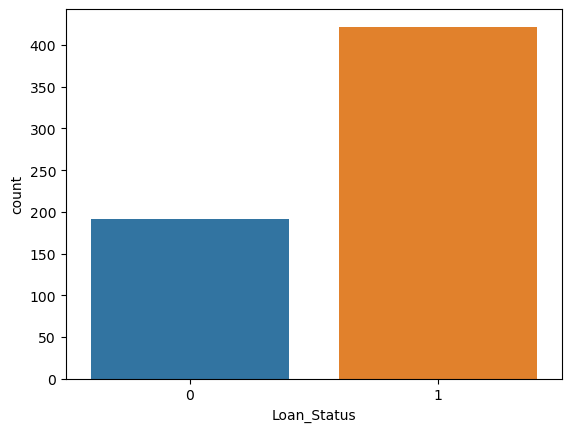

In [44]:
sns.countplot(loands['Loan_Status'])
print(loands['Loan_Status'].value_counts())

for Loan status plot point 1 has the highest values.

2.Univariate Analysis

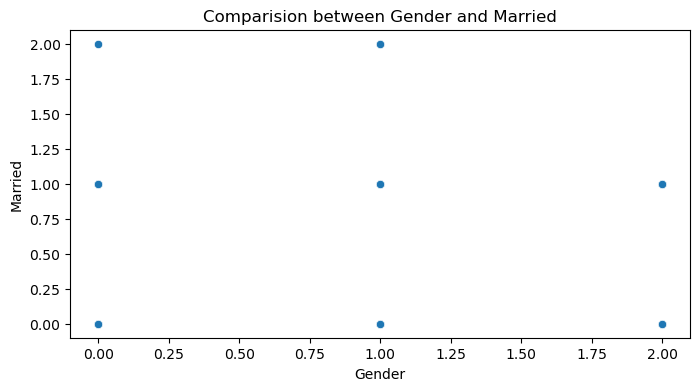

In [46]:
# Comparision between Gender and Married

plt.figure(figsize=(8,4))
plt.title('Comparision between Gender and Married')
sns.scatterplot(x='Gender',y='Married' ,data=loands ,palette='spring')
plt.show()

In the plot we can see that point 2 has the lowest value.

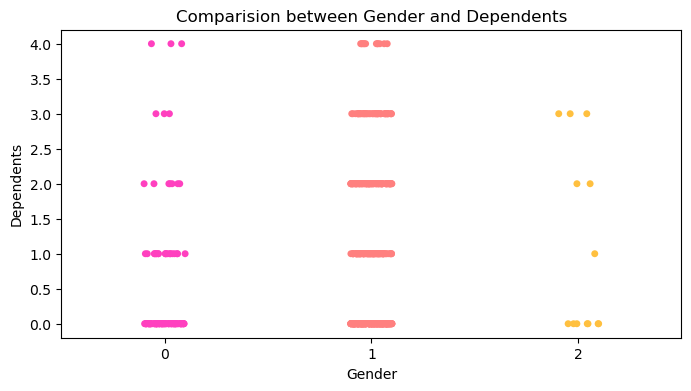

In [49]:
# Comparision between Gender and Dependents

plt.figure(figsize=(8,4))
plt.title('Comparision between Gender and Dependents')
sns.stripplot(x='Gender',y='Dependents' ,data=loands ,palette='spring')
plt.show()

In this plot we see that gender and dependent has maximum value at point 1.

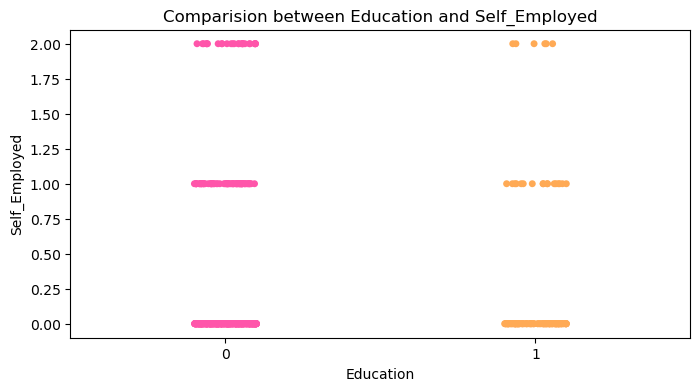

In [50]:
# Comparision between Education and Self_Employed

plt.figure(figsize=(8,4))
plt.title('Comparision between Education and Self_Employed')
sns.stripplot(x='Education',y='Self_Employed' ,data=loands ,palette='spring')
plt.show()

In this plot we can see that point 0 has the maximum values.

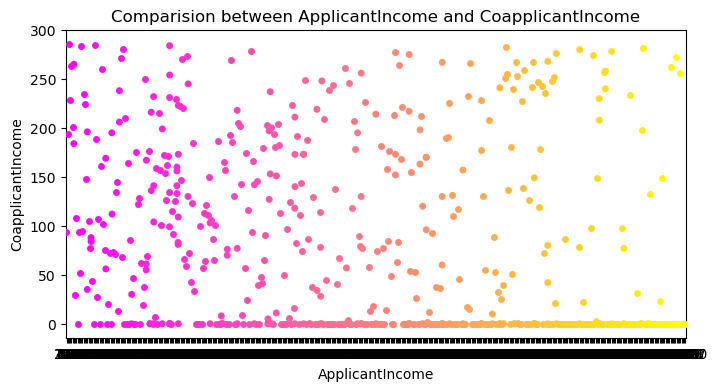

In [51]:
# Comparision between ApplicantIncome and CoapplicantIncome

plt.figure(figsize=(8,4))
plt.title('Comparision between ApplicantIncome and CoapplicantIncome')
sns.stripplot(x='ApplicantIncome',y='CoapplicantIncome' ,data=loands ,palette='spring')
plt.show()

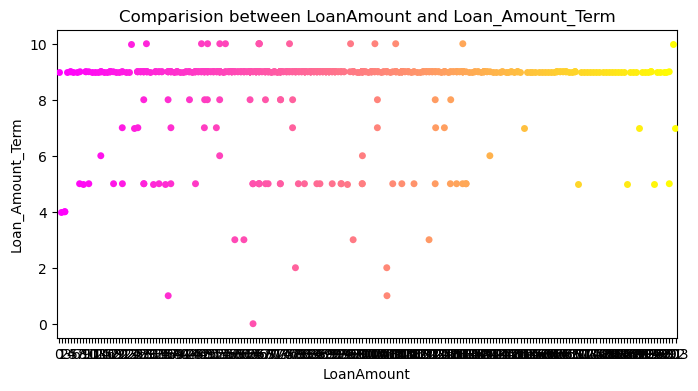

In [52]:
# Comparision between LoanAmount and Loan_Amount_Term

plt.figure(figsize=(8,4))
plt.title('Comparision between LoanAmount and Loan_Amount_Term')
sns.stripplot(x='LoanAmount',y='Loan_Amount_Term' ,data=loands ,palette='spring')
plt.show()

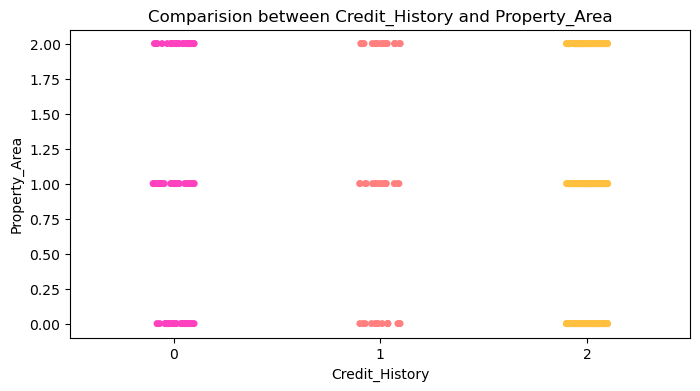

In [53]:
# Comparision between Credit_History and Property_Area

plt.figure(figsize=(8,4))
plt.title('Comparision between Credit_History and Property_Area')
sns.stripplot(x='Credit_History',y='Property_Area' ,data=loands ,palette='spring')
plt.show()

In this plot we can see that point 2 has the maximum values. 

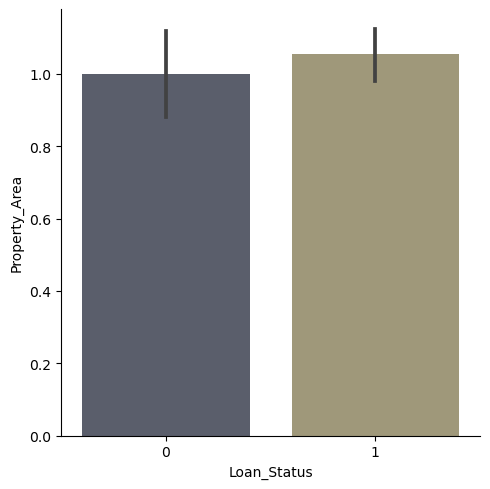

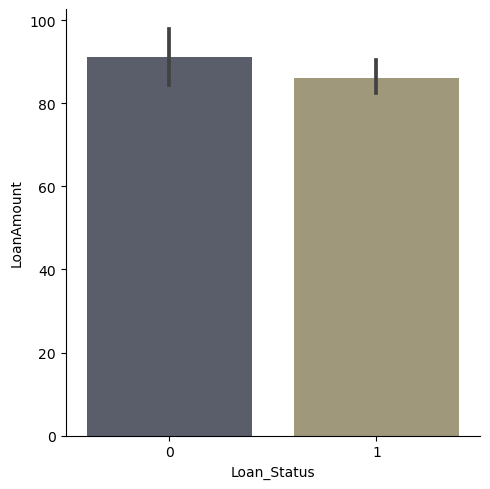

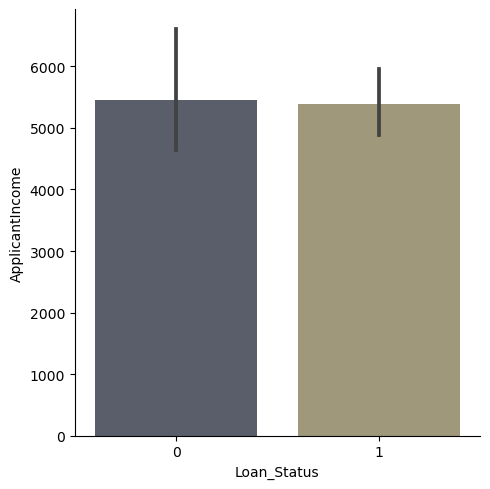

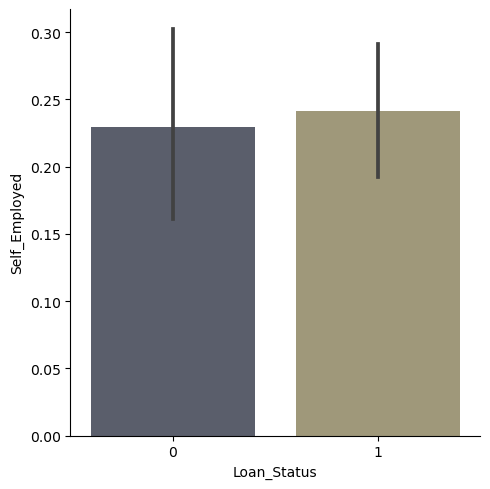

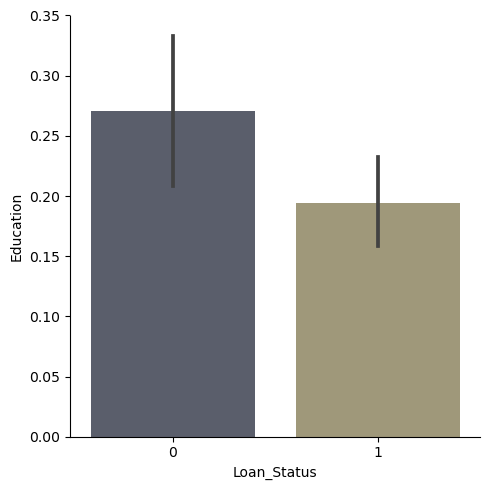

In [56]:
# Checking Loan_Status with Property_Area
sns.catplot(x='Loan_Status' , y='Property_Area' , data=loands , palette='cividis' , kind='bar')

# Checking Loan_Status with LoanAmount
sns.catplot(x='Loan_Status' , y='LoanAmount' , data=loands , palette='cividis' , kind='bar')

# Checking Loan_Status with ApplicantIncome
sns.catplot(x='Loan_Status' , y='ApplicantIncome' , data=loands , palette='cividis' , kind='bar')

# Checking Loan_Status with Self_Employed
sns.catplot(x='Loan_Status' , y='Self_Employed' , data=loands , palette='cividis' , kind='bar')

# Checking Loan_Status with Education
sns.catplot(x='Loan_Status' , y='Education' , data=loands , palette='cividis' , kind='bar')

In 1st plot we have property area has the maximum of loan status at point 1 .

in 2nd plot loan amount has maximum value of loan status at point 0.

In the 3rd plot we see that applicantincome has almost equal value with loanstatus.

In 4th plot self_employed has maximum value of loan status at point 1 .

In 5th plot education has maximum values of loan status at point 0 .

3. Multivariate Analysis

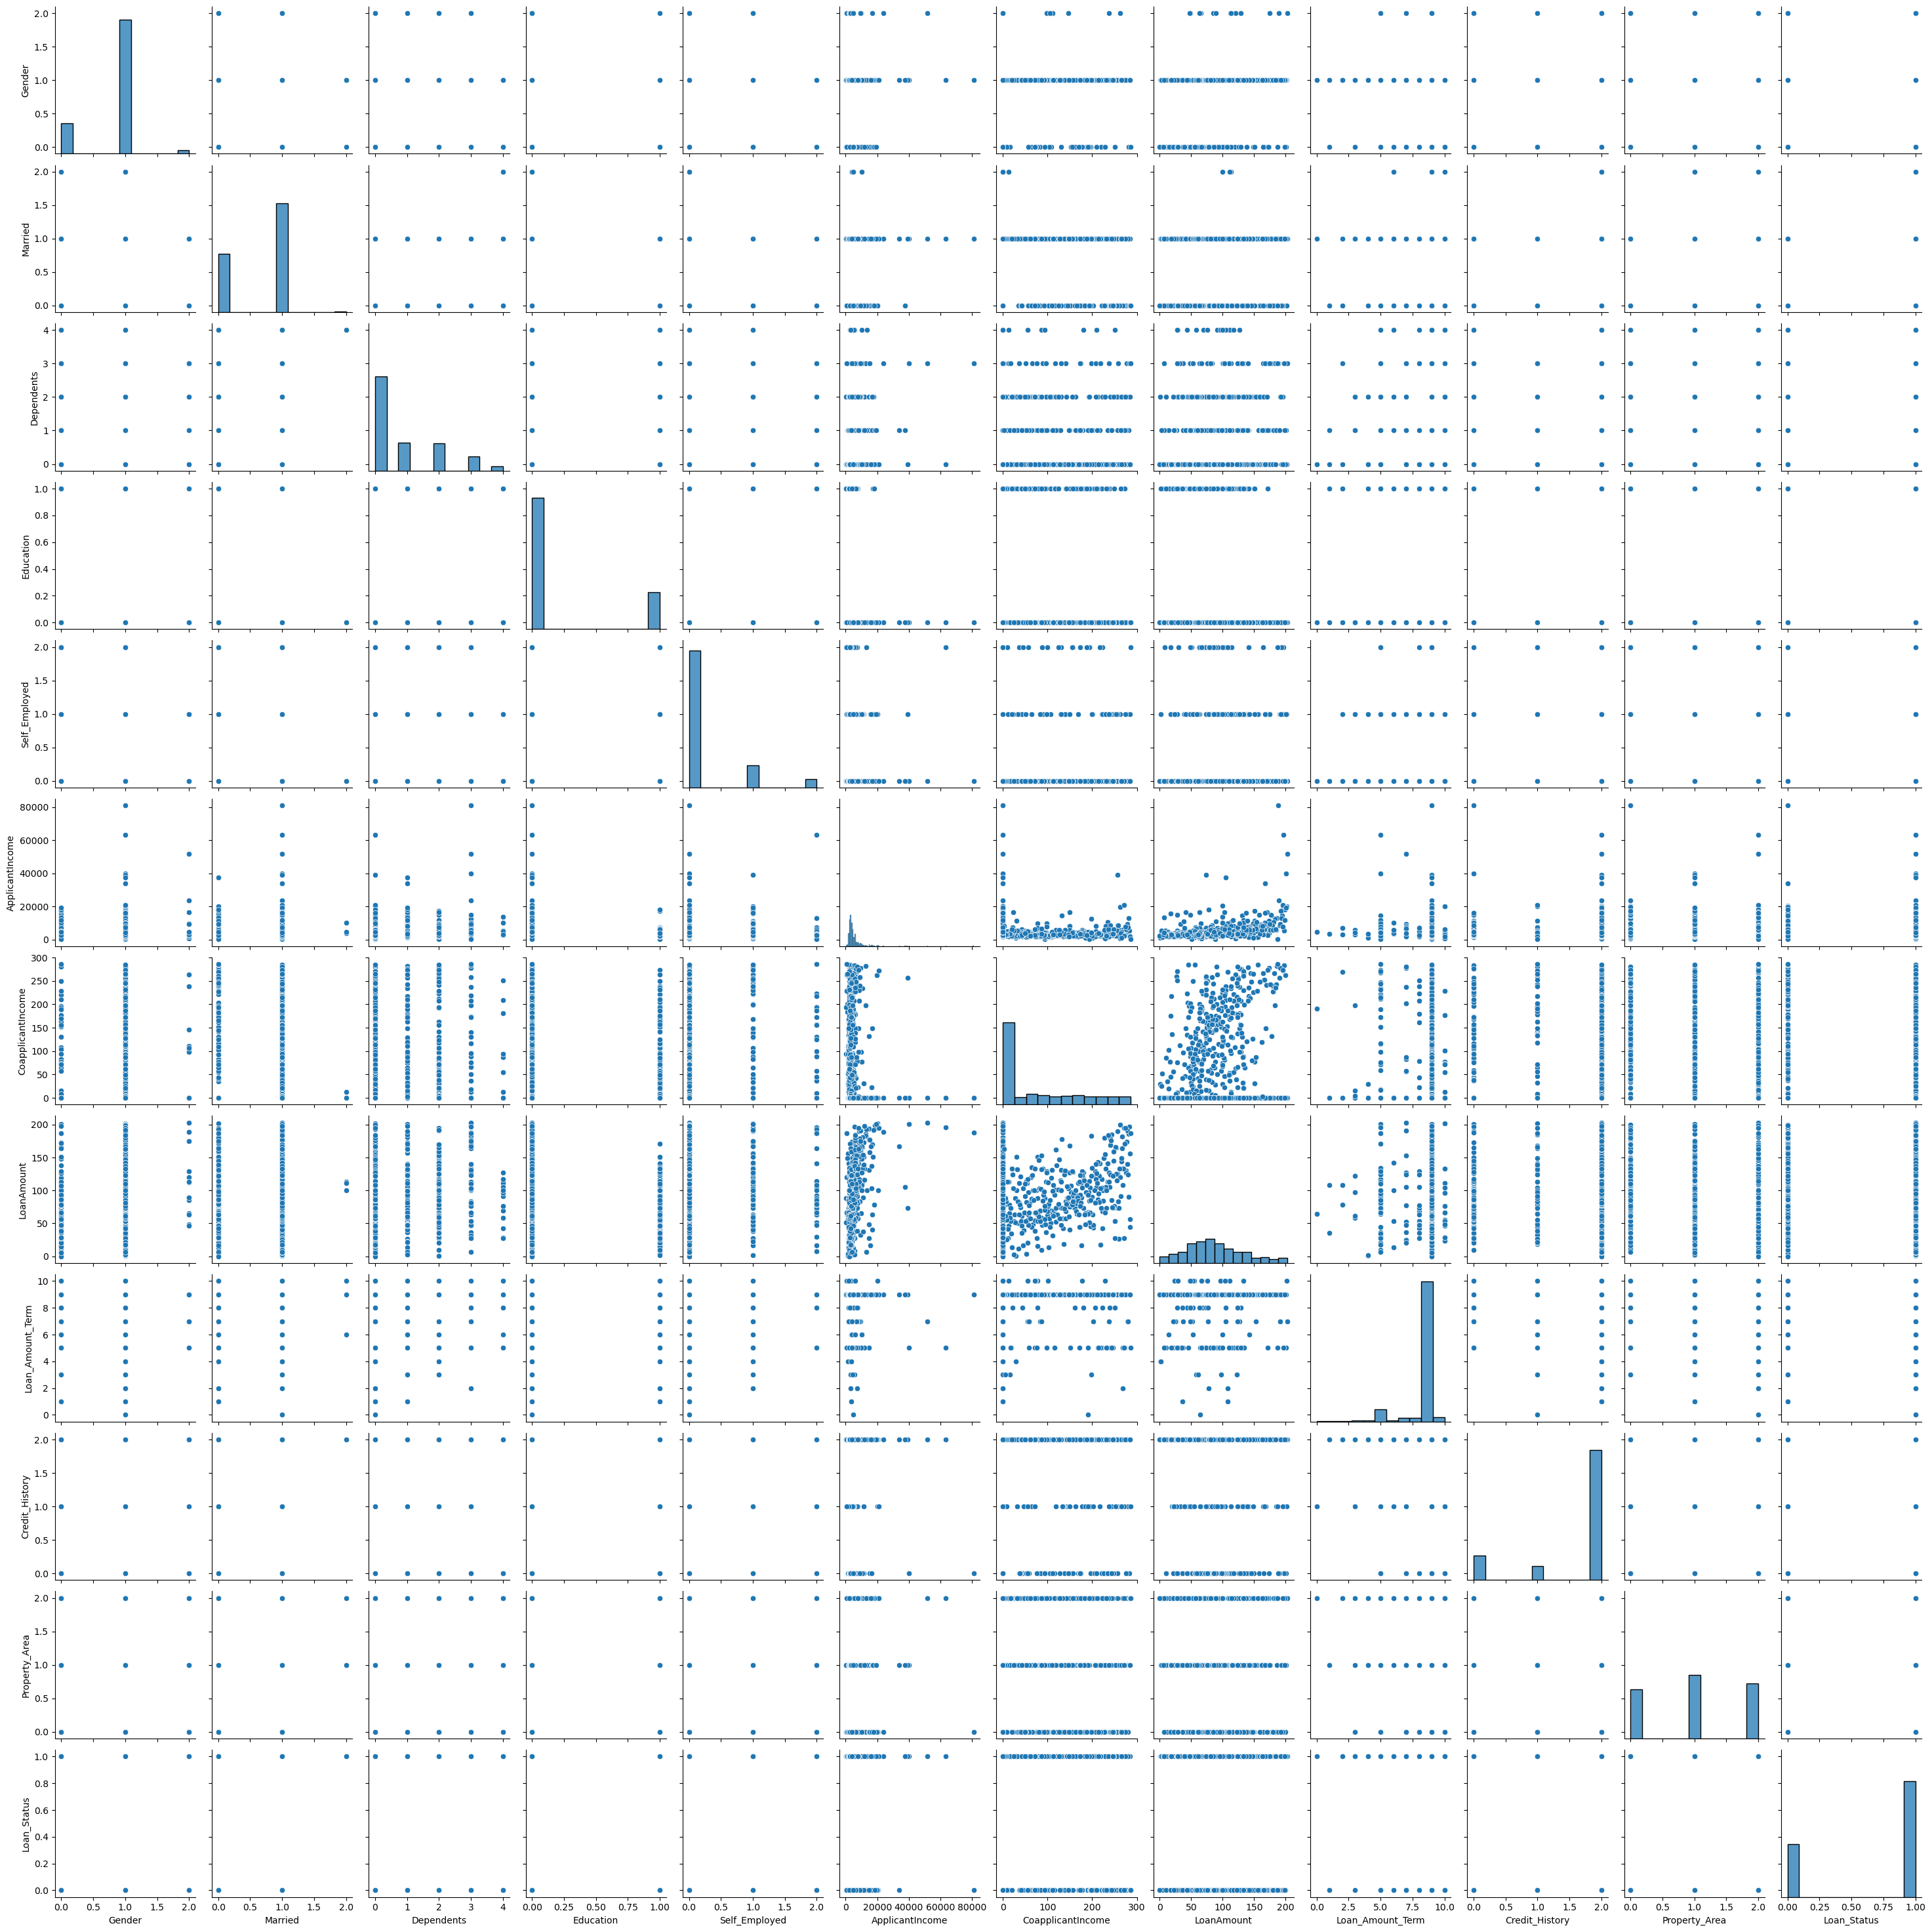

In [57]:
sns.pairplot(loands , palette='cividis')

Its pairwise presentation of the dataset .

As per this we can also see there is outlier present in the dataset.

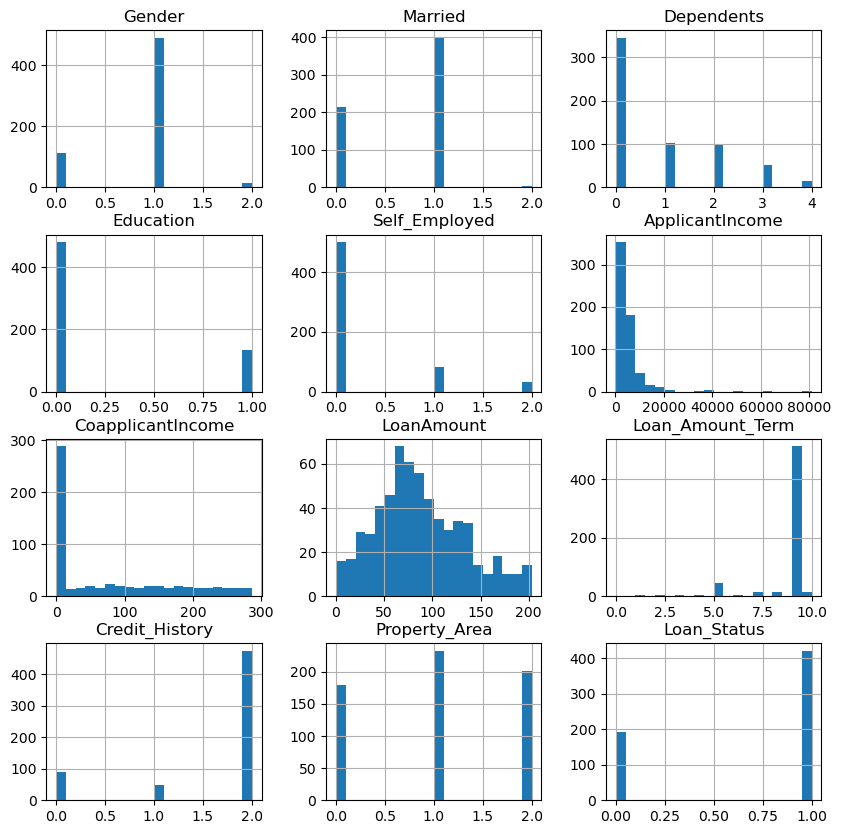

In [58]:
loands.hist(bins=20, figsize=(10,10))
plt.show()

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

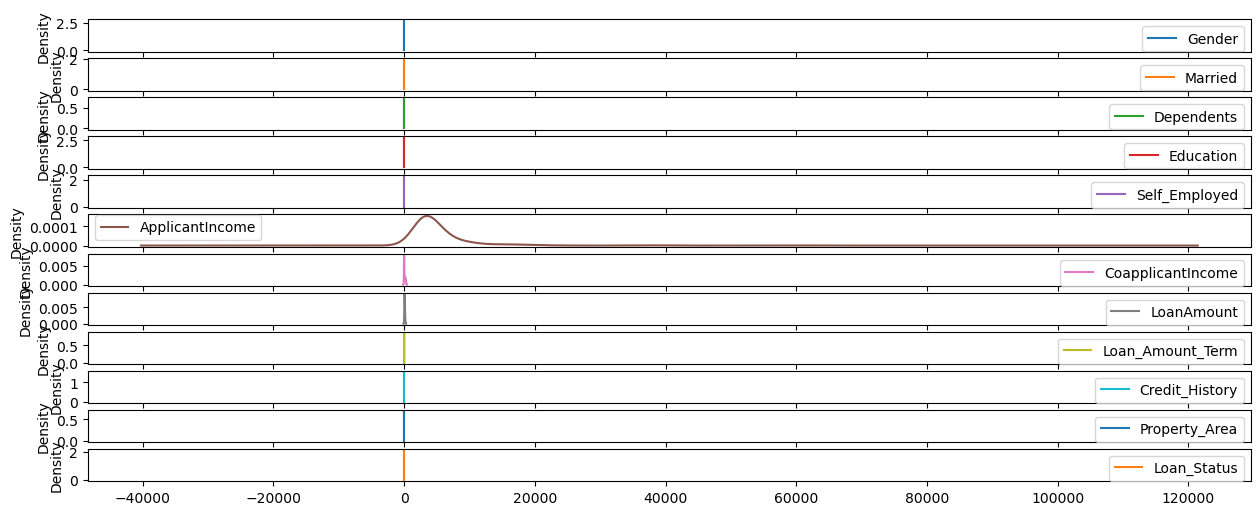

In [59]:
loands.plot(kind='kde' , subplots=True , figsize=(15,6))

# Checking Skewness

In [60]:
loands.skew()

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    0.780870
LoanAmount           0.458715
Loan_Amount_Term    -2.907201
Credit_History      -1.606726
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

as per above we can see that there is skewness is present in the dataset and we need to remove it.

In [61]:
loands['Dependents'] = np.cbrt(loands['Dependents'])

In [62]:
loands['Education'] = np.cbrt(loands['Education'])

In [63]:
loands['Self_Employed'] = np.cbrt(loands['Self_Employed'])

In [64]:
loands['ApplicantIncome'] = np.cbrt(loands['ApplicantIncome'])

In [65]:
loands['Loan_Amount_Term'] = np.cbrt(loands['Loan_Amount_Term'])

In [66]:
loands['Credit_History '] = np.cbrt(loands['Credit_History'])

In [67]:
loands.skew()

Gender              -0.953015
Married             -0.538097
Dependents           0.375622
Education            1.367622
Self_Employed        1.679574
ApplicantIncome      2.083638
CoapplicantIncome    0.780870
LoanAmount           0.458715
Loan_Amount_Term    -5.561142
Credit_History      -1.606726
Property_Area       -0.066196
Loan_Status         -0.809998
Credit_History      -1.925611
dtype: float64

now the skewness is almost removed.

# Checking Outlier

<Figure size 800x200 with 0 Axes>

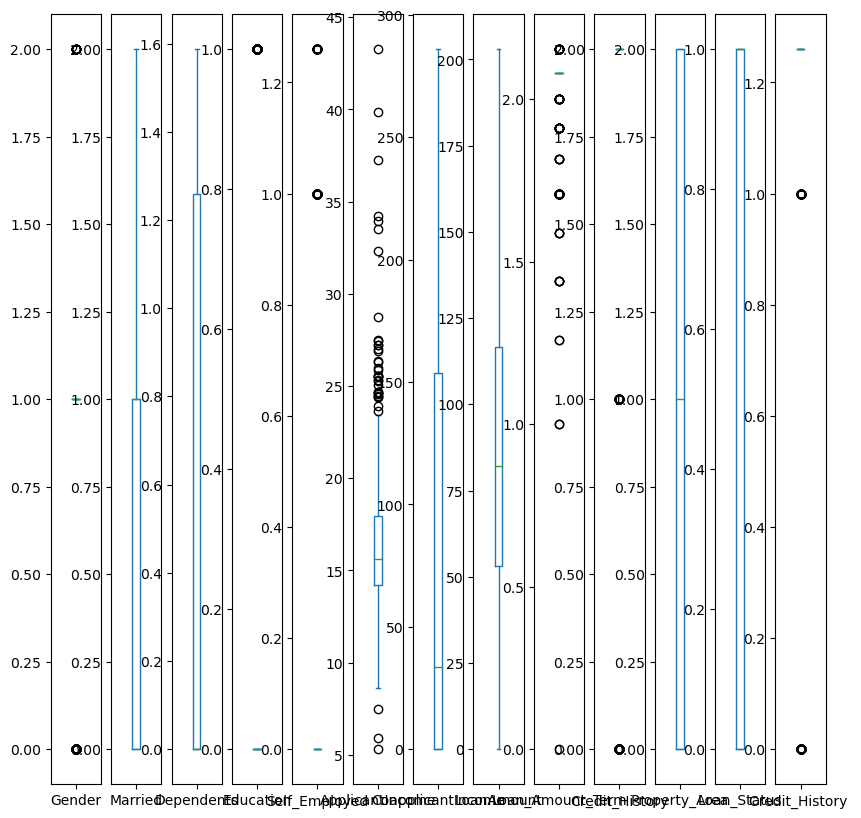

In [68]:
plt.figure(figsize=(8,2))
loands.plot(kind='box' ,subplots=True  ,figsize=(10,10))
plt.show()

as per above we can see that there is outlier is present in dataset .

In [69]:
# removing Outlier

from scipy.stats import zscore

In [70]:
z = np.abs(zscore(loands))
z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Credit_History
Loan_ID,,,,,,,,,,,,,
LP001002,0.382616,1.357847,0.864524,0.528362,0.474057,0.380325,0.852357,0.269107,0.298844,0.513300,1.223298,0.674519,0.462611
LP001003,0.382616,0.705812,0.760671,0.528362,0.474057,0.022870,0.204048,0.147259,0.298844,0.513300,1.318513,1.482537,0.462611
LP001005,0.382616,0.705812,0.864524,0.528362,1.905579,0.533028,0.852357,1.352528,0.298844,0.513300,1.223298,0.674519,0.462611
LP001006,0.382616,0.705812,0.864524,1.892641,0.474057,0.711341,0.876466,0.322571,0.298844,0.513300,1.223298,0.674519,0.462611
LP001008,0.382616,1.357847,0.864524,0.528362,0.474057,0.419383,0.852357,0.137623,0.298844,0.513300,1.223298,0.674519,0.462611
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,1.990376,1.357847,0.864524,0.528362,0.474057,0.574203,0.852357,1.286786,0.298844,0.513300,1.318513,0.674519,0.462611
LP002979,0.382616,0.705812,1.479413,0.528362,0.474057,0.128936,0.852357,1.768894,2.009063,0.513300,1.318513,0.674519,0.462611
LP002983,0.382616,0.705812,0.760671,0.528362,0.474057,0.899211,0.819941,1.649687,0.298844,0.513300,1.223298,0.674519,0.462611


In [71]:
print(np.where(z>3))

(array([ 68, 126, 155, 171, 183, 185, 242, 262, 313, 333, 409, 443, 495,
       497, 546, 575, 585], dtype=int64), array([8, 5, 5, 5, 5, 5, 8, 8, 8, 5, 5, 5, 8, 8, 8, 8, 8], dtype=int64))


In [72]:
loands_new = loands[(z<3).all(axis=1)]
loands_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Credit_History
Loan_ID,,,,,,,,,,,,,
LP001002,1,0,0.000000,0.0,0.0,18.017473,0,100,2.080084,2,2,1,1.259921
LP001003,1,1,1.000000,0.0,0.0,16.610522,60,81,2.080084,2,0,0,1.259921
LP001005,1,1,0.000000,0.0,1.0,14.422496,0,26,2.080084,2,2,1,1.259921
LP001006,1,1,0.000000,1.0,0.0,13.720654,160,73,2.080084,2,2,1,1.259921
LP001008,1,0,0.000000,0.0,0.0,18.171206,0,94,2.080084,2,2,1,1.259921
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,0.000000,0.0,0.0,14.260431,0,29,2.080084,2,0,1,1.259921
LP002979,1,1,1.442250,0.0,0.0,16.013010,0,7,1.709976,2,0,1,1.259921
LP002983,1,1,1.000000,0.0,0.0,20.059821,3,163,2.080084,2,2,1,1.259921


In [73]:
loands_new.shape

(597, 13)

In [74]:
loands.shape

(614, 13)

Now we see that outlier are removed .

In [75]:
loands = loands_new

In [76]:
# Checking correlation 

loands.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Credit_History
Gender,1.000000,0.336406,0.142037,0.027865,-0.014342,0.048823,0.177236,0.143794,-0.084474,0.006550,-0.033121,-0.000087,-0.000071
Married,0.336406,1.000000,0.364479,0.012858,-0.040326,0.005882,0.205179,0.179347,-0.104032,0.006647,0.009834,0.092725,0.014277
Dependents,0.142037,0.364479,1.000000,0.058024,0.053302,0.092947,-0.057625,0.136725,-0.091471,-0.044315,0.063495,-0.004989,-0.051421
Education,0.027865,0.012858,0.058024,1.000000,-0.024497,-0.183970,-0.051140,-0.162326,-0.112208,-0.088652,-0.069926,-0.084008,-0.083578
Self_Employed,-0.014342,-0.040326,0.053302,-0.024497,1.000000,0.139252,-0.020421,0.103692,-0.027435,0.021078,-0.024831,-0.003100,0.035416
ApplicantIncome,0.048823,0.005882,0.092947,-0.183970,0.139252,1.000000,-0.240079,0.511522,0.012987,0.056693,-0.029031,-0.001798,0.051109
CoapplicantIncome,0.177236,0.205179,-0.057625,-0.051140,-0.020421,-0.240079,1.000000,0.293261,-0.033432,-0.040438,-0.087558,0.005343,-0.024121
LoanAmount,0.143794,0.179347,0.136725,-0.162326,0.103692,0.511522,0.293261,1.000000,0.101053,-0.004447,-0.083869,-0.051397,0.005950
Loan_Amount_Term,-0.084474,-0.104032,-0.091471,-0.112208,-0.027435,0.012987,-0.033432,0.101053,1.000000,0.035688,-0.080810,0.005845,0.044309
Credit_History,0.006550,0.006647,-0.044315,-0.088652,0.021078,0.056693,-0.040438,-0.004447,0.035688,1.000000,-0.018173,0.525641,0.975437


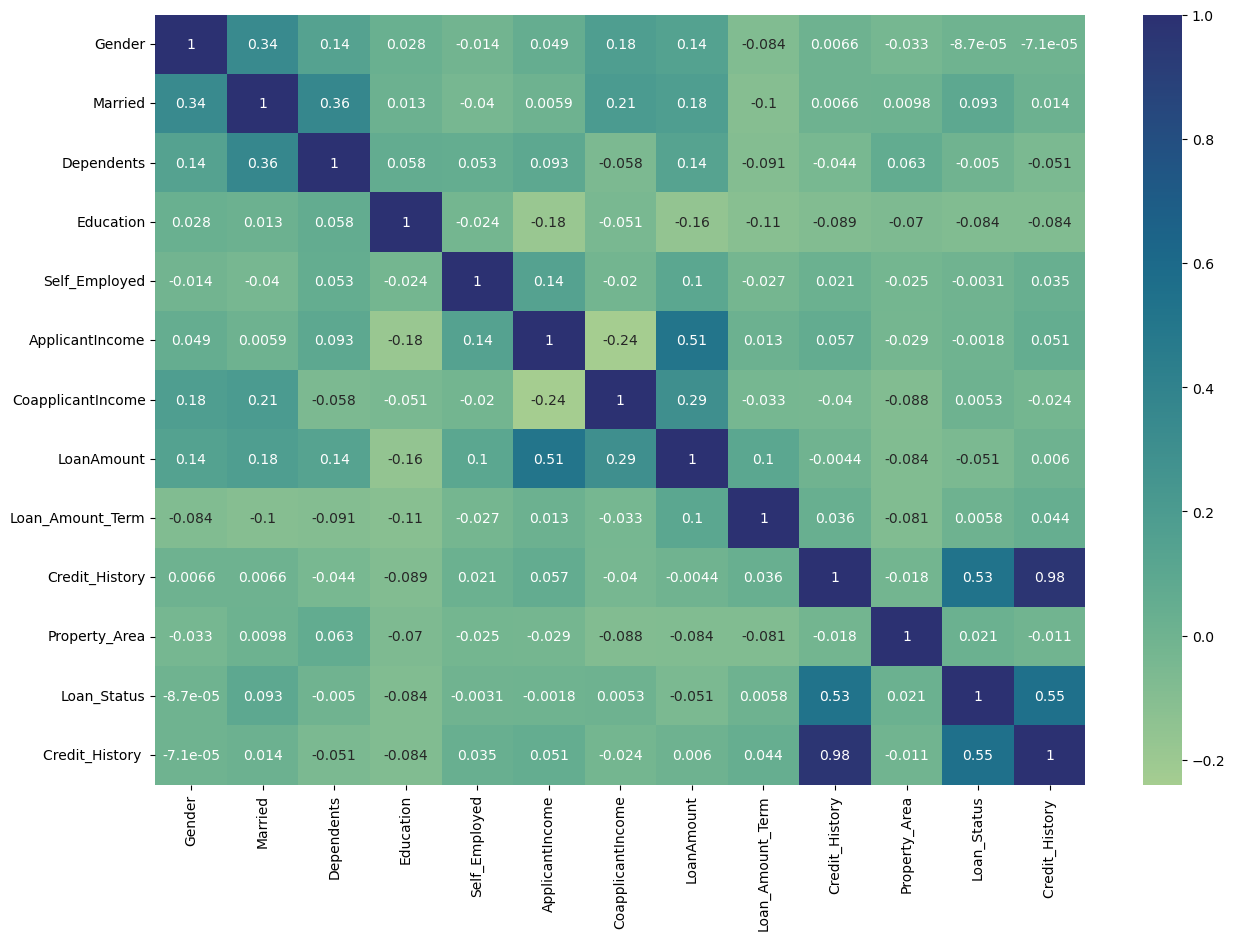

In [77]:
# checking heatmap for correlation

plt.figure(figsize=(15,10))
sns.heatmap(loands.corr() , cmap='crest' , annot=True)
plt.show()

as per above heatmap we can see multicollinearity is present in the dataset.

In [78]:
# assigning x and y value 

x1 = loands.drop('Loan_Status',axis=1)
y = loands['Loan_Status']

In [79]:
x1.shape

(597, 12)

In [80]:
# for removing multicollinearity we need only columns from x , where rows=0 and columns=1

x1.shape[1]

12

In [82]:
y.value_counts()

1    410
0    187
Name: Loan_Status, dtype: int64

# Use of VIF for multicollinearity

In [83]:
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
def vif_cal(x1):
    vif = pd.DataFrame()
    vif['Variable'] = x1.columns
    vif['VIF factor'] = [variance_inflation_factor(x1.values ,i) for i in range(x1.shape[1])]
    return vif

vif_cal(x1)

,Variable,VIF factor
0,Gender,5.720524
1,Married,3.774946
2,Dependents,2.102337
3,Education,1.347868
4,Self_Employed,1.265346
5,ApplicantIncome,41.051582
6,CoapplicantIncome,2.530589
7,LoanAmount,8.524617
8,Loan_Amount_Term,39.942769
9,Credit_History,127.359049


Here we need to drop the highest collinear columns for removing the multicollinearity.

In [85]:
# dropping columns to remove multicollinearity

x1 = loands.drop(['ApplicantIncome','Loan_Amount_Term','Credit_History'],axis=1)

In [86]:
vif_cal(x1)

,Variable,VIF factor
0,Gender,5.009286
1,Married,3.804778
2,Dependents,2.095689
3,Education,1.261268
4,Self_Employed,1.243805
5,CoapplicantIncome,2.047190
6,LoanAmount,4.743686
7,Property_Area,2.383940
8,Loan_Status,4.662128
9,Credit_History,7.690183


Now we see that multicollinearity is almost removed.

In [90]:
y.value_counts()

1    410
0    187
Name: Loan_Status, dtype: int64

as per above we can see that data is no balanced and we need to balanced the data.

# OverSampling

Applying SMOTE method to overcome with oversampling .

In [91]:
# oversampling the data

from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)

In [92]:
y1.value_counts()

1    410
0    410
Name: Loan_Status, dtype: int64

In [99]:
y=y1

In [101]:
x=x1

# Performing Train_test_split method

In [97]:
from sklearn.model_selection import train_test_split

In [102]:
x_train , x_test , y_train , y_test = train_test_split(x ,y, test_size=.30 , random_state=45)

In [103]:
x_train.shape

(574, 10)

In [104]:
x_test.shape

(246, 10)

In [105]:
y_train.shape

(574,)

In [106]:
y_test.shape

(246,)

# Applying Models

In [107]:
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error , accuracy_score
from sklearn.model_selection import cross_val_score

In [108]:
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge , LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , BaggingRegressor , AdaBoostRegressor 
from sklearn.svm import SVR

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , BaggingClassifier , AdaBoostClassifier 
from sklearn.svm import SVC

In [110]:
lr = LinearRegression()
lr.fit(x_train , y_train)
pred_lr = lr.predict(x_test)
print('Linear Regression')

print('r2 score:',r2_score(y_test,pred_lr))
print('mean squared error:',mean_squared_error(y_test,pred_lr))
print('mean absolute error:',mean_absolute_error(y_test,pred_lr))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_lr)))

Linear Regression
r2 score: 1.0
mean squared error: 5.463267507642741e-31
mean absolute error: 5.766418115914916e-16
squared root error: 7.39139195797567e-16


In [111]:
ls = Lasso(alpha=0.1)
ls.fit(x_train,y_train)
pred_ls = ls.predict(x_test)
print('Lasso Regression')

print('r2 score:',r2_score(y_test,pred_ls))
print('mean squared error:',mean_squared_error(y_test,pred_ls))
print('mean absolute error:',mean_absolute_error(y_test,pred_ls))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

Lasso Regression
r2 score: 0.8373567651430447
mean squared error: 0.0406500582856013
mean absolute error: 0.20104612890834955
squared root error: 0.20161859608082114


In [112]:
rd = Ridge(alpha=0.1)
rd.fit(x_train,y_train)
pred_rd = rd.predict(x_test)
print('Ridge Regression')

print('r2 score:',r2_score(y_test,pred_rd))
print('mean squared error:',mean_squared_error(y_test,pred_rd))
print('mean absolute error:',mean_absolute_error(y_test,pred_rd))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

Ridge Regression
r2 score: 0.9999992666443632
mean squared error: 1.8329043568850968e-07
mean absolute error: 0.0003708063513901027
squared root error: 0.0004281243227013734


In [113]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred_lg = lg.predict(x_test)
print('LogisticRegression')

print('r2 score:',r2_score(y_test,pred_lg))
print('mean squared error:',mean_squared_error(y_test,pred_lg))
print('mean absolute error:',mean_absolute_error(y_test,pred_lg))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_lg)))

LogisticRegression
r2 score: 1.0
mean squared error: 0.0
mean absolute error: 0.0
squared root error: 0.0


In [114]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
print('DecisionTreeRegressor')

print('r2 score:',r2_score(y_test,pred_dtr))
print('mean squared error:',mean_squared_error(y_test,pred_dtr))
print('mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

DecisionTreeRegressor
r2 score: 1.0
mean squared error: 0.0
mean absolute error: 0.0
squared root error: 0.0


In [115]:
knr = KNeighborsRegressor()
knr.fit(x_train , y_train)
pred_knr = knr.predict(x_test)
print('KNeighborsRegressor')

print('r2 score:',r2_score(y_test,pred_knr))
print('mean squared error:',mean_squared_error(y_test,pred_knr))
print('mean absolute error:',mean_absolute_error(y_test,pred_knr))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_knr)))

KNeighborsRegressor
r2 score: 0.16856066115702473
mean squared error: 0.2078048780487805
mean absolute error: 0.367479674796748
squared root error: 0.4558562032579797


In [116]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr = rfr.predict(x_test)
print('RandomForestRegressor')

print('r2 score:',r2_score(y_test,pred_rfr))
print('mean squared error:',mean_squared_error(y_test,pred_rfr))
print('mean absolute error:',mean_absolute_error(y_test,pred_rfr))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_rfr)))

RandomForestRegressor
r2 score: 1.0
mean squared error: 0.0
mean absolute error: 0.0
squared root error: 0.0


In [117]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train , y_train)
pred_gbr = gbr.predict(x_test)
print('GradientBoostingRegressor')

print('r2 score:',r2_score(y_test,pred_gbr))
print('mean squared error:',mean_squared_error(y_test,pred_gbr))
print('mean absolute error:',mean_absolute_error(y_test,pred_gbr))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

GradientBoostingRegressor
r2 score: 0.9999999992941113
mean squared error: 1.764255139168765e-10
mean absolute error: 1.3282204296346591e-05
squared root error: 1.3282526639042608e-05


In [118]:
br = BaggingRegressor()
br.fit(x_train,y_train)
pred_br = br.predict(x_test)
print('BaggingRegressor')

print('r2 score:',r2_score(y_test,pred_br))
print('mean squared error:',mean_squared_error(y_test,pred_br))
print('mean absolute error:',mean_absolute_error(y_test,pred_br))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_br)))

BaggingRegressor
r2 score: 1.0
mean squared error: 0.0
mean absolute error: 0.0
squared root error: 0.0


In [119]:
abr = AdaBoostRegressor()
abr.fit(x_train , y_train)
pred_abr = abr.predict(x_test)
print('AdaBoostRegressor')

print('r2 score:',r2_score(y_test,pred_abr))
print('mean squared error:',mean_squared_error(y_test,pred_abr))
print('mean absolute error:',mean_absolute_error(y_test,pred_abr))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_abr)))

AdaBoostRegressor
r2 score: 1.0
mean squared error: 0.0
mean absolute error: 0.0
squared root error: 0.0


In [120]:
svr = SVR()
svr.fit(x_train , y_train)
pred_svr = svr.predict(x_test)
print('SVR')

print('r2 score:',r2_score(y_test,pred_svr))
print('mean squared error:',mean_squared_error(y_test,pred_svr))
print('mean absolute error:',mean_absolute_error(y_test,pred_svr))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

SVR
r2 score: -0.1629737522274377
mean squared error: 0.2906665675596536
mean absolute error: 0.47030190780598063
squared root error: 0.5391350179311798


In [121]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train , y_train)
pred_dtc = dtc.predict(x_test)
print('DecisionTreeClassifier')

print('r2 score:',r2_score(y_test,pred_dtc))
print('mean squared error:',mean_squared_error(y_test,pred_dtc))
print('mean absolute error:',mean_absolute_error(y_test,pred_dtc))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_dtc)))

DecisionTreeClassifier
r2 score: 1.0
mean squared error: 0.0
mean absolute error: 0.0
squared root error: 0.0


In [122]:
knc = KNeighborsClassifier()
knc.fit(x_train , y_train)
pred_knc = knc.predict(x_test)
print('KNeighborsClassifier')

print('r2 score:',r2_score(y_test,pred_knc))
print('mean squared error:',mean_squared_error(y_test,pred_knc))
print('mean absolute error:',mean_absolute_error(y_test,pred_knc))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_knc)))

KNeighborsClassifier
r2 score: -0.2686280991735537
mean squared error: 0.3170731707317073
mean absolute error: 0.3170731707317073
squared root error: 0.563092506371473


In [123]:
rfc = RandomForestClassifier()
rfc.fit(x_train , y_train)
pred_rfc = rfc.predict(x_test)
print('RandomForestClassifier')

print('r2 score:',r2_score(y_test,pred_rfc))
print('mean squared error:',mean_squared_error(y_test,pred_rfc))
print('mean absolute error:',mean_absolute_error(y_test,pred_rfc))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_rfc)))

RandomForestClassifier
r2 score: 1.0
mean squared error: 0.0
mean absolute error: 0.0
squared root error: 0.0


In [124]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train , y_train)
pred_gbc = gbc.predict(x_test)
print('GradientBoostingClassifier')

print('r2 score:',r2_score(y_test,pred_gbc))
print('mean squared error:',mean_squared_error(y_test,pred_gbc))
print('mean absolute error:',mean_absolute_error(y_test,pred_gbc))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_gbc)))

GradientBoostingClassifier
r2 score: 1.0
mean squared error: 0.0
mean absolute error: 0.0
squared root error: 0.0


In [125]:
bc = BaggingClassifier()
bc.fit(x_train , y_train)
pred_bc = bc.predict(x_test)
print('BaggingClassifier')

print('r2 score:',r2_score(y_test,pred_bc))
print('mean squared error:',mean_squared_error(y_test,pred_bc))
print('mean absolute error:',mean_absolute_error(y_test,pred_bc))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_bc)))

BaggingClassifier
r2 score: 1.0
mean squared error: 0.0
mean absolute error: 0.0
squared root error: 0.0


In [126]:
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)
pred_abc = abc.predict(x_test)
print('AdaBoostClassifier')

print('r2 score:',r2_score(y_test,pred_abc))
print('mean squared error:',mean_squared_error(y_test,pred_abc))
print('mean absolute error:',mean_absolute_error(y_test,pred_abc))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_abc)))

AdaBoostClassifier
r2 score: 1.0
mean squared error: 0.0
mean absolute error: 0.0
squared root error: 0.0


In [127]:
svc = SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
print('SVC')

print('r2 score:',r2_score(y_test,pred_svc))
print('mean squared error:',mean_squared_error(y_test,pred_svc))
print('mean absolute error:',mean_absolute_error(y_test,pred_svc))
print('squared root error:',np.sqrt(mean_squared_error(y_test,pred_svc)))

SVC
r2 score: -0.8053553719008264
mean squared error: 0.45121951219512196
mean absolute error: 0.45121951219512196
squared root error: 0.6717287489717274


# Cross Validation Score

In [129]:
score1 = cross_val_score(lr,x,y)
print('score1:',score1)
print('score1 mean:',score1.mean())
print('score1 std:',score1.std())
print('Differnce between r2 score and mean:',(r2_score(y_test,pred_lr)-score1.mean())*100)

score1: [1. 1. 1. 1. 0.]
score1 mean: 0.8
score1 std: 0.4
Differnce between r2 score and mean: 19.999999999999996


In [130]:
score2 = cross_val_score(ls,x,y)
print('score2:',score2)
print('score2 mean:',score2.mean())
print('score2 std:',score2.std())
print('Differnce between r2 score and mean:',(r2_score(y_test,pred_ls)-score2.mean())*100)

score2: [0.80521968 0.78033519 0.79480634 0.83250896 0.        ]
score2 mean: 0.6425740371878114
score2 std: 0.32173998436058865
Differnce between r2 score and mean: 19.47827279552333


In [131]:
score3 = cross_val_score(rd,x,y)
print('score3:',score3)
print('score3 mean:',score3.mean())
print('score3 std:',score3.std())
print('Differnce between r2 score and mean:',(r2_score(y_test,pred_rd)-score3.mean())*100)

score3: [0.99999937 0.99999905 0.99999934 0.99999951 0.        ]
score3 mean: 0.7999994539825966
score3 std: 0.39999972699132524
Differnce between r2 score and mean: 19.999981266176658


In [132]:
score4 = cross_val_score(lg,x,y)
print('score4:',score4)
print('score4 mean:',score4.mean())
print('score4 std:',score4.std())
print('Differnce between r2 score and mean:',(r2_score(y_test,pred_lg)-score4.mean())*100)

score4: [1. 1. 1. 1. 1.]
score4 mean: 1.0
score4 std: 0.0
Differnce between r2 score and mean: 0.0


In [133]:
score5 = cross_val_score(dtr,x,y)
print('score5:',score5)
print('score5 mean:',score5.mean())
print('score5 std:',score5.std())
print('Differnce between r2 score and mean:',(r2_score(y_test,pred_dtr)-score5.mean())*100)

score5: [1. 1. 1. 1. 1.]
score5 mean: 1.0
score5 std: 0.0
Differnce between r2 score and mean: 0.0


In [134]:
score6 = cross_val_score(knr,x,y)
print('score6:',score6)
print('score6 mean:',score6.mean())
print('score6 std:',score6.std())
print('Differnce between r2 score and mean:',(r2_score(y_test,pred_knr)-score6.mean())*100)

score6: [-0.10989899 -0.2585561  -0.15002747  0.19130092  0.        ]
score6 mean: -0.06543632794265024
score6 std: 0.15272443569834682
Differnce between r2 score and mean: 23.399698909967498


In [135]:
score7 = cross_val_score(rfr,x,y)
print('score7:',score7)
print('score7 mean:',score7.mean())
print('score7 std:',score7.std())
print('Differnce between r2 score and mean:',(r2_score(y_test,pred_rfr)-score7.mean())*100)

score7: [1. 1. 1. 1. 1.]
score7 mean: 1.0
score7 std: 0.0
Differnce between r2 score and mean: 0.0


In [136]:
score8 = cross_val_score(gbr,x,y)
print('score8:',score8)
print('score8 mean:',score8.mean())
print('score8 std:',score8.std())
print('Differnce between r2 score and mean:',(r2_score(y_test,pred_gbr)-score8.mean())*100)

score8: [1. 1. 1. 1. 0.]
score8 mean: 0.7999999993192703
score8 std: 0.3999999996596352
Differnce between r2 score and mean: 19.999999997484096


In [137]:
score9 = cross_val_score(br,x,y)
print('score9:',score9)
print('score9 mean:',score9.mean())
print('score9 std:',score9.std())
print('Differnce between r2 score and mean:',(r2_score(y_test,pred_br)-score9.mean())*100)

score9: [1. 1. 1. 1. 1.]
score9 mean: 1.0
score9 std: 0.0
Differnce between r2 score and mean: 0.0


In [138]:
score10 = cross_val_score(abr,x,y)
print('score10:',score10)
print('score10 mean:',score10.mean())
print('score10 std:',score10.std())
print('Differnce between r2 score and mean:',(r2_score(y_test,pred_abr)-score10.mean())*100)

score10: [1. 1. 1. 1. 1.]
score10 mean: 1.0
score10 std: 0.0
Differnce between r2 score and mean: 0.0


In [139]:
score11 = cross_val_score(svr,x,y)
print('score11:',score11)
print('score11 mean:',score11.mean())
print('score11 std:',score11.std())
print('Differnce between r2 score and mean:',(r2_score(y_test,pred_svr)-score11.mean())*100)

score11: [-0.74929489 -1.0789627  -1.00655303 -0.21549386  0.        ]
score11 mean: -0.6100608974788757
score11 std: 0.42995777982113864
Differnce between r2 score and mean: 44.7087145251438


In [140]:
score12 = cross_val_score(dtc,x,y)
print('score12:',score12)
print('score12 mean:',score12.mean())
print('score12 std:',score12.std())
print('Differnce between r2 score and mean:',(r2_score(y_test,pred_dtc)-score12.mean())*100)

score12: [1. 1. 1. 1. 1.]
score12 mean: 1.0
score12 std: 0.0
Differnce between r2 score and mean: 0.0


In [141]:
score13 = cross_val_score(knc,x,y)
print('score13:',score13)
print('score13 mean:',score13.mean())
print('score13 std:',score13.std())
print('Differnce between r2 score and mean:',(r2_score(y_test,pred_knc)-score13.mean())*100)

score13: [0.68902439 0.64634146 0.70731707 0.70731707 0.73170732]
score13 mean: 0.6963414634146341
score13 std: 0.028443667779733162
Differnce between r2 score and mean: -96.49695625881878


In [142]:
score14 = cross_val_score(rfc,x,y)
print('score14:',score14)
print('score14 mean:',score14.mean())
print('score14 std:',score14.std())
print('Differnce between r2 score and mean:',(r2_score(y_test,pred_rfc)-score14.mean())*100)

score14: [1. 1. 1. 1. 1.]
score14 mean: 1.0
score14 std: 0.0
Differnce between r2 score and mean: 0.0


In [143]:
score15 = cross_val_score(gbc,x,y)
print('score15:',score15)
print('score15 mean:',score15.mean())
print('score15 std:',score15.std())
print('Differnce between r2 score and mean:',(r2_score(y_test,pred_gbc)-score15.mean())*100)

score15: [1. 1. 1. 1. 1.]
score15 mean: 1.0
score15 std: 0.0
Differnce between r2 score and mean: 0.0


In [144]:
score16 = cross_val_score(bc,x,y)
print('score16:',score16)
print('score16 mean:',score16.mean())
print('score16 std:',score16.std())
print('Differnce between r2 score and mean:',(r2_score(y_test,pred_bc)-score16.mean())*100)

score16: [1. 1. 1. 1. 1.]
score16 mean: 1.0
score16 std: 0.0
Differnce between r2 score and mean: 0.0


In [145]:
score17 = cross_val_score(abc,x,y)
print('score17:',score17)
print('score17 mean:',score17.mean())
print('score17 std:',score17.std())
print('Differnce between r2 score and mean:',(r2_score(y_test,pred_abc)-score17.mean())*100)

score17: [1. 1. 1. 1. 1.]
score17 mean: 1.0
score17 std: 0.0
Differnce between r2 score and mean: 0.0


In [146]:
score18 = cross_val_score(svc,x,y)
print('score18:',score18)
print('score18 mean:',score18.mean())
print('score18 std:',score18.std())
print('Differnce between r2 score and mean:',(r2_score(y_test,pred_svc)-score18.mean())*100)

score18: [0.56707317 0.48780488 0.5304878  0.51829268 0.48780488]
score18 mean: 0.5182926829268293
score18 std: 0.02962184829631979
Differnce between r2 score and mean: -132.36480548276558


As per above cross validation score Support Vector Classifier is the best model and it will be used for prediction .

# Finalizing the model

In [147]:
final_svc = SVC()
final_svc.fit(x_train,y_train)
pred_svc = final_svc.predict(x_test)
print(pred_svc)

[0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0
 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0
 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0
 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1
 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0]


# Saving Best Model

In [148]:
# Saving best model

import joblib
joblib.dump(final_svc,'loan_svc.pkl')

['loan_svc.pkl']

In [149]:
# predicting the saved model
model = joblib.load('loan_svc.pkl')

# Prediction
prediction = model.predict(x_test)
prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0])

# Checking the Predicted Model

In [150]:
a = np.array(y_test)
loan = pd.DataFrame()
loan['predicted'] = prediction
loan['original'] = a

loan

,predicted,original
0,0,1
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
241,1,0
242,0,0
243,0,0
244,1,1


# Hyper Parameter tunning

In [151]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['linear','poly','rbf'],'gamma':['scale','auto'],
              'random_state':[10,50,100]
             }

In [152]:
grid = GridSearchCV(SVC(),parameters,cv=2)
grid.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'random_state': [10, 50, 100]})

In [153]:
grid.best_params_

{'gamma': 'scale', 'kernel': 'linear', 'random_state': 10}

In [154]:
Final_md =SVC(gamma= 'scale', kernel='linear',random_state= 10)
Final_md.fit(x_train,y_train)
pred_md = Final_md.predict(x_test)
print(pred_md)

[1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1
 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0
 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0
 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1
 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0]


In [155]:
# Saving the model

import pickle
loan ='loan.pkl'
pickle.dump(Final_md,open(loan,'wb')) # model saved

In [156]:
# loading saved model

loaded_model = pickle.load(open('loan.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

100.0


In [157]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]], index =['Predict','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
Predict,1,1,1,1,0,1,1,0,1,1,...,1,1,0,0,0,0,0,0,1,0
Original,1,1,1,1,0,1,1,0,1,1,...,1,1,0,0,0,0,0,0,1,0


Here the prediction is done for loan dataset .And SVC is the best model .